<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_27_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 27: Cartograms for meterorite landings, countplot, histogram

## Recap

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Recap code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

m_df=pd.read_csv("/content/drive/MyDrive/datasets/meteorite-landings.csv")
m_df.head()

# Retrieve the rows having the year values greater than or equal to 860 and less than or equal to 2016 at the same time.
correct_years_df = m_df[(m_df["year"]>=860) & (m_df["year"]<= 2016)]
correct_years_df


# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = m_df[(m_df['year'] >= 860) & (m_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

##**Cartograms**

We will create a cartogram using the Folium package. There are other Python packages to create cartograms but Folium is the easiest one to get started.

A cartogram is simply a world map marked with the country-wise or state-wise trend in data. We will create a cartogram for the landing sites of meteorites. It will have markers for the places from where a meteorite was found to pin-point the meteorite landing site.

### Activity 1: The Good & Withered Meteorites Separation

Our next task is to make a cartogram for the landing locations of the meteorites found on Earth. They were found in two conditions: the good and the withered condition. The condition of the meteorites is described in the `nametype` column. If the `nametype` value is `Valid`, then it means the condition of the meteorite found is good whereas if the `nametype` value is `Relict`, then it means the condition of the meteorite found is withered.

Before creating a cartogram, let's create two DataFrames.

- The first DataFrame for the meteorites which were actually found and are in good condition (`nametype` value is `Valid`).

- The second DataFrame for the meteorites which were actually found and are in a withered condition (`nametype` value is `Relict`).

In [ ]:
# Find out how many meteorites are in good condition ('nametype' == 'Valid') and how many are withered ('nametype' == 'Relict').
correct_lat_long_df["nametype"].value_counts()

,count
nametype,
Valid,31967
Relict,69


So, there are only 69 meteorites which have withered due to the prolonged exposure to probably the extreme weather conditions. The other meteorites are in good condition. Since the withered meteorites are fewer in numbers, let's create a DataFrame for the same and create its cartogram because it would be easier for us to spot these meteorites on a map.

In [ ]:
#Create a DataFrame called 'found_relict_df' and store data only for those meteorites which were actually found.
found_relict_df= correct_lat_long_df[(correct_lat_long_df["nametype"]=="Relict") & (correct_lat_long_df["fall"]=="Found")]
found_relict_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
5182,Brunflo,5157,Relict,Relict H,29.6,Found,1980.0,63.11667,14.28333,"(63.116670, 14.283330)"
6810,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.7,Found,1992.0,-75.31667,162.00000,"(-75.316670, 162.000000)"
12627,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
15944,Gullhögen 001,44889,Relict,Relict OC,29.6,Found,2000.0,58.38333,13.80000,"(58.383330, 13.800000)"
20674,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.5,Found,1987.0,-84.34563,161.31058,"(-84.345630, 161.310580)"
...,...,...,...,...,...,...,...,...,...,...
31072,Österplana 060,56159,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31073,Österplana 061,56160,Relict,Relict OC,0.0,Found,2009.0,58.58333,13.43333,"(58.583330, 13.433330)"
31074,Österplana 062,56161,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"
31075,Österplana 063,56162,Relict,Relict OC,0.0,Found,2010.0,58.58333,13.43333,"(58.583330, 13.433330)"


Now, create a DataFrame for the meteorites which were actually found and are in good condition (`nametype` value is `Valid`).

In [ ]:
found_relict_df.shape

(69, 10)

In [ ]:
# Create a DataFrame called 'found_valid_df' and store data only for those meteorites which were actually found.
found_valid_df=correct_lat_long_df[(correct_lat_long_df["fall"] == "Found") & (correct_lat_long_df["nametype"] == "Valid")]
found_valid_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1108,Abajo,4,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667,"(26.800000, -105.416670)"
1109,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937,"(22.721920, 48.959370)"
1110,Abbott,5,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333,"(36.300000, -104.283330)"
1111,Abernathy,7,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000,"(33.850000, -101.800000)"
1112,Abo,8,Valid,H,1.20,Found,1840.0,60.43333,22.30000,"(60.433330, 22.300000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.30,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


So there are 30,871 meteorites which were found in good condition.

---

In [ ]:
found_relict_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
5182,Brunflo,5157,Relict,Relict H,29.6,Found,1980.0,63.11667,14.28333,"(63.116670, 14.283330)"
6810,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.7,Found,1992.0,-75.31667,162.00000,"(-75.316670, 162.000000)"
12627,Gove,52859,Relict,Relict iron,0.0,Found,1979.0,-12.26333,136.83833,"(-12.263330, 136.838330)"
15944,Gullhögen 001,44889,Relict,Relict OC,29.6,Found,2000.0,58.38333,13.80000,"(58.383330, 13.800000)"
20674,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.5,Found,1987.0,-84.34563,161.31058,"(-84.345630, 161.310580)"


In [ ]:
found_relict_df.loc[12627,"name"]

'Gove'

In [ ]:
found_relict_df["name"]

,name
5182,Brunflo
6810,David Glacier 92308
12627,Gove
15944,Gullhögen 001
20674,Lewis Cliff 87241
...,...
31072,Österplana 060
31073,Österplana 061
31074,Österplana 062
31075,Österplana 063


### Activity 2: Cartogram For Withered Meteorites

Let's create a cartogram for all the withered meteorites that were found. We need to add a marker for every single meteorite listed in the `found_relict_df`. Hence, we need to use the `for` loop to iterate through each entry in the `found_reliect_df` DataFrame. Then we also need to use the `loc[]` function to get the latitude and longitude values for each meteorite. Since we need to display the location of the meteorite site in each marker through the popup window, we again will have to use the `loc[]` function.

**Note:** If you are creating a world map, then provide the coordinates of the equator (`0, 0`) as input in the `Map()` function to create a symmetric map.

In [ ]:
found_relict_df.index

Index([ 5182,  6810, 12627, 15944, 20674, 23093, 31013, 31014, 31015, 31016,
       31017, 31019, 31020, 31021, 31022, 31023, 31024, 31025, 31026, 31027,
       31028, 31029, 31030, 31031, 31032, 31033, 31034, 31035, 31036, 31037,
       31038, 31039, 31040, 31041, 31042, 31043, 31044, 31045, 31046, 31047,
       31048, 31049, 31050, 31051, 31052, 31053, 31054, 31055, 31056, 31057,
       31058, 31059, 31060, 31061, 31062, 31063, 31064, 31065, 31066, 31067,
       31068, 31069, 31070, 31071, 31072, 31073, 31074, 31075, 31076],
      dtype='int64')

In [ ]:
for i in found_relict_df.index:
    print(i)

In [ ]:
found_relict_df.index

In [ ]:
found_relict_df.loc[31072,["name"]]

In [ ]:
found_relict_df.loc[:,["name"]]

In [ ]:
found_relict_df.loc[31072]

,31072
name,Österplana 060
id,56159
nametype,Relict
recclass,Relict OC
mass,0.0
fall,Found
year,2009.0
reclat,58.58333
reclong,13.43333
GeoLocation,"(58.583330, 13.433330)"


In [ ]:
found_relict_df.loc[31072,"reclong"]

13.43333

In [ ]:
# Create a cartogram for the landing sites of the meteorites found in the withered condition.

map1 = folium.Map(location=[0,0],width="80%",height="70%",zoom_start = 1.5)
for i in found_relict_df.index:
    folium.Marker(location=[found_relict_df.loc[i,"reclat"],found_relict_df.loc[i,"reclong"]],
                  popup= found_relict_df.loc[i,"name"]).add_to(map1)
map1

---

The `popup` parameter displays the name of the location on a popup box when clicked on a marker. Along with the city name, we can also display the mass of a meteorite in the popup of the markers. For this, we will have to use **string concatenation**. It is a process in which two or more Python objects can be joined together into one string object.


---

### Activity 3: Count Plots

Now let's make a count plot for all the years after 2000 to see the variation in the number of meteorites observed over the years.

In [ ]:
# Create a DataFrame called 'm_2000_df' and store data for the meteorites discovered after 1990.
m_2000_df = correct_lat_long_df[correct_lat_long_df ["year"] >2000]
m_2000_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001.0,13.66033,28.96000,"(13.660330, 28.960000)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,45.82133,6.01533,"(45.821330, 6.015330)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.745750, 32.412750)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009.0,31.80500,-97.01000,"(31.805000, -97.010000)"
82,Bassikounou,44876,Valid,H5,29560.0,Fell,2006.0,15.78333,-5.90000,"(15.783330, -5.900000)"
...,...,...,...,...,...,...,...,...,...,...
45687,Yucca 015,57175,Valid,H-metal,3.0,Found,2011.0,34.81970,-114.27610,"(34.819700, -114.276100)"
45688,Yucca 016,57158,Valid,H5,25.9,Found,2011.0,34.82658,-114.27763,"(34.826580, -114.277630)"
45689,Yucca 017,57159,Valid,H5,200.0,Found,2011.0,34.81923,-114.27735,"(34.819230, -114.277350)"
45702,Zelfana,31353,Valid,L5,1058.0,Found,2002.0,32.15833,4.63333,"(32.158330, 4.633330)"




To create a count plot, we will use the `countplot()` function which exists in the `seaborn` module. It takes two inputs. The first input is the axis on which the values to be plotted and the second input is the source of the data.

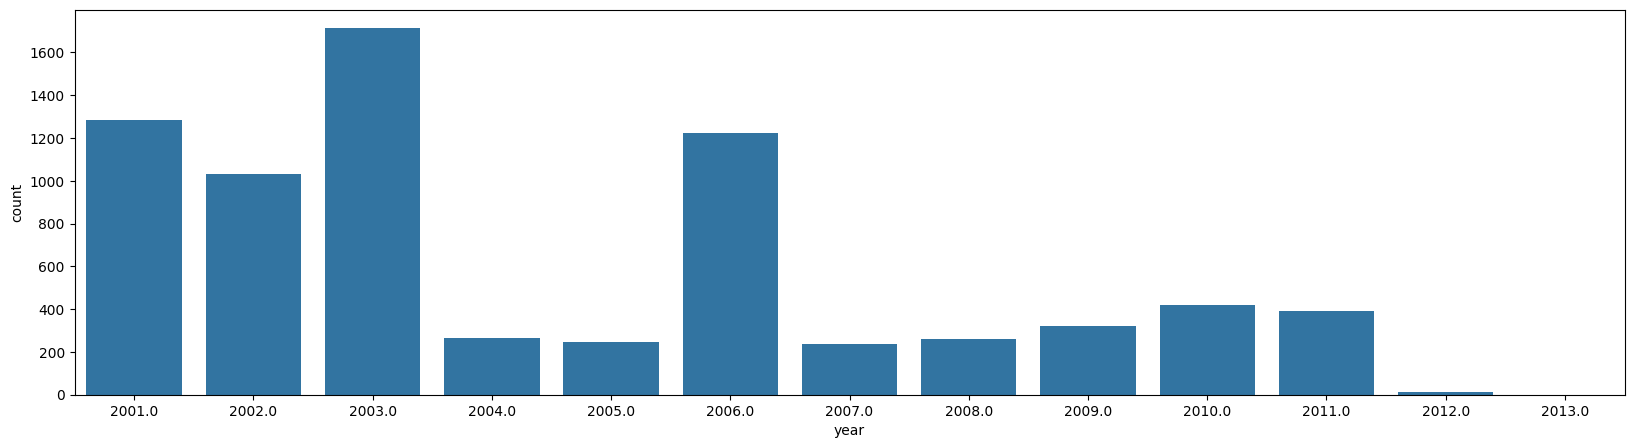

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="year",data=m_2000_df)
plt.show()

In [ ]:
# Create a count plot
import seaborn as sns
sns.countplot(x= m_2000_df["year"])
plt.show()

---

### Activity 4: Horizontal Bars In Count Plot

We can also change the orientation of a count plot by plotting it horizontally.

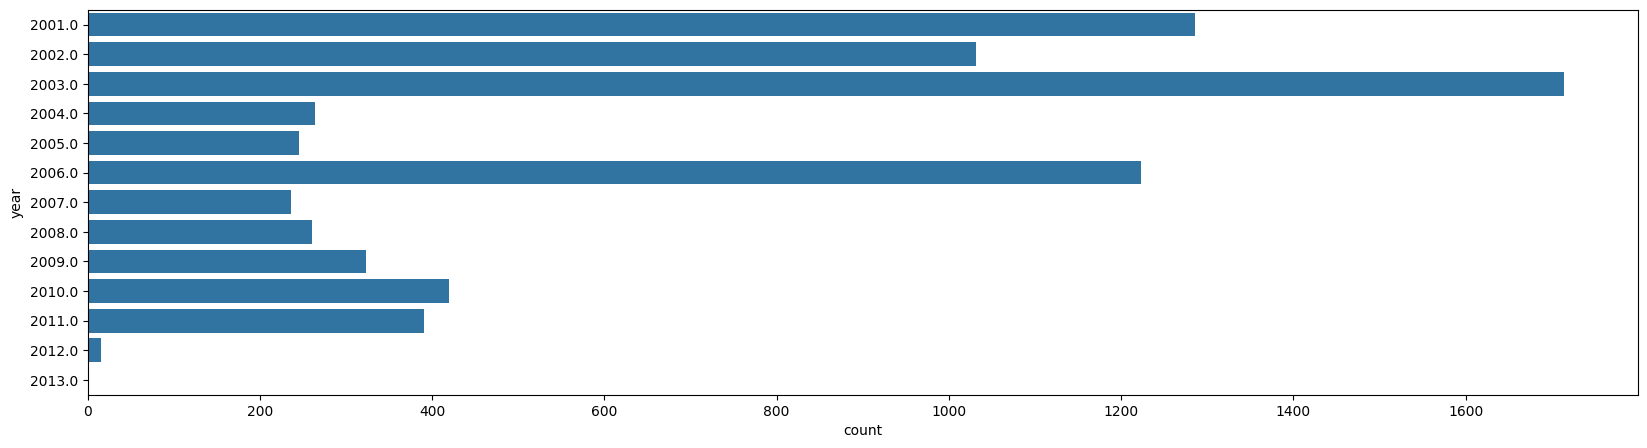

In [ ]:
# Create a horizontal count plot
plt.figure(figsize=(20,5))
sns.countplot(y="year",data=m_2000_df)
plt.show()


---

### Activity 5: The `hue` Parameter
We can differentiate the count bars according to a specific category in a count plot. For instance, we can display:

1. The number of meteorites that fell and were not discovered in a given year, and
2. The number of meteorites that fell and were discovered in the same year.
To achieve this differentiation in the count bars, we use the hue parameter.

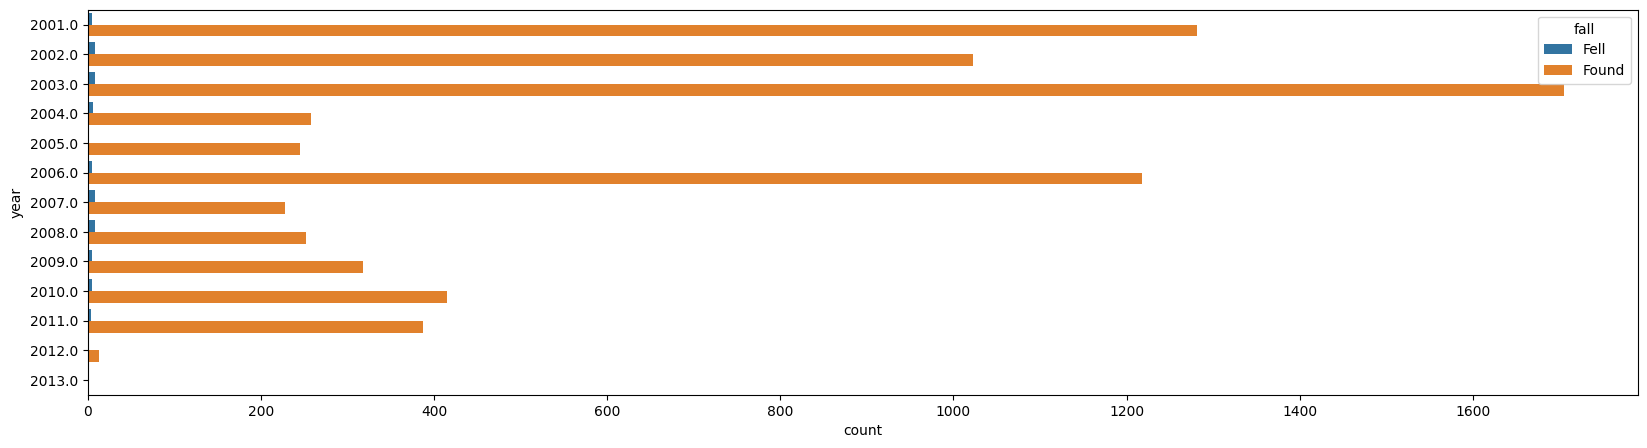

In [ ]:
# Split the count bar for a year into the 'Fell' bar and the 'Found' bar.
plt.figure(figsize=(20,5))
sns.countplot(y="year",data=m_2000_df, hue="fall")
plt.show()


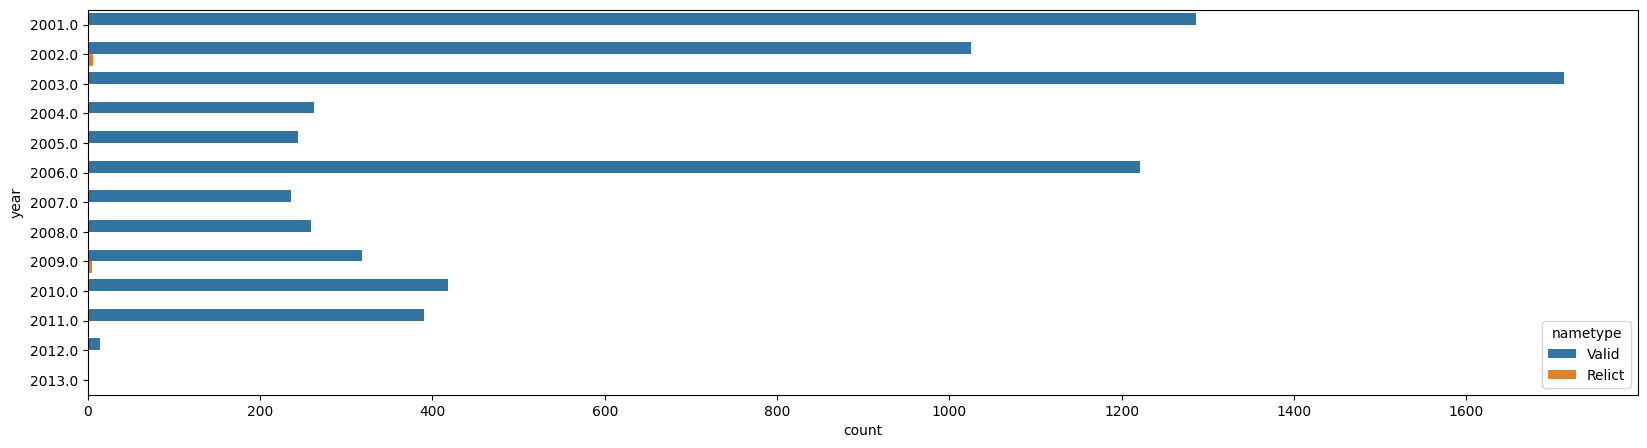

In [ ]:
#Split the count bar for year into the 'Valid' bar and the 'Relict' bar.
plt.figure(figsize=(20,5))
sns.countplot(y="year",data=m_2000_df,hue="nametype")
plt.show()


In [ ]:
# Sample DataFrame
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Computer_Class": ["Opted", "Not Opted", "Opted", "Not Opted", "Opted", "Opted", "Not Opted", "Not Opted", "Opted", "Not Opted"]
}
df = pd.DataFrame(data)
df

,Gender,Computer_Class
0,Male,Opted
1,Female,Not Opted
2,Male,Opted
3,Female,Not Opted
4,Male,Opted
5,Female,Opted
6,Male,Not Opted
7,Female,Not Opted
8,Male,Opted
9,Female,Not Opted


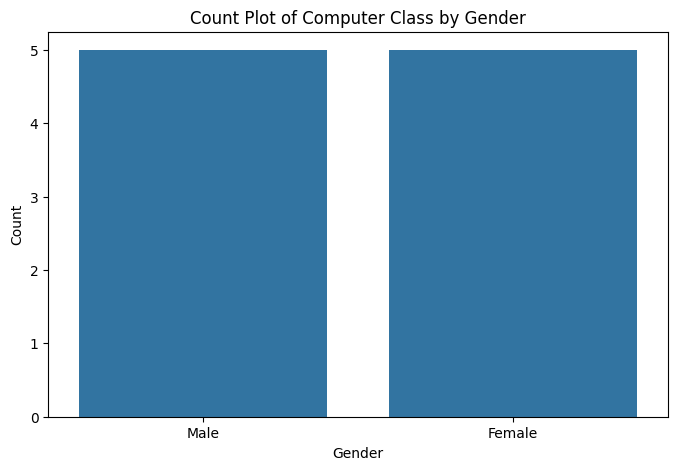

In [ ]:

# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender")
plt.title("Count Plot of Computer Class by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

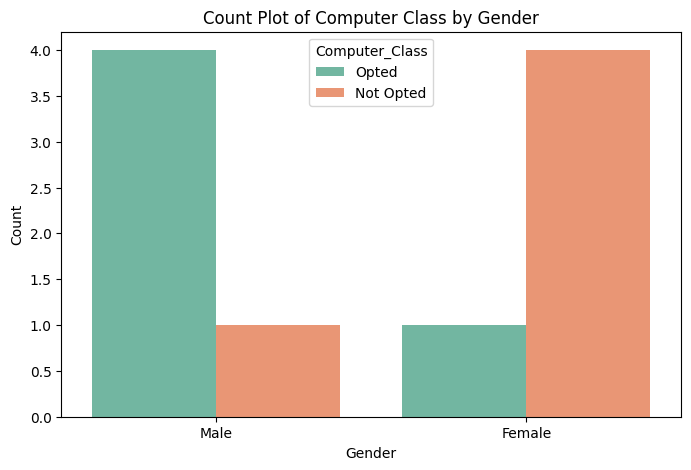

In [ ]:

# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Computer_Class", palette="Set2")
plt.title("Count Plot of Computer Class by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Activity 6: Histograms

Count plots are useful for visualizing the distribution of a categorical feature across different categories. They are particularly effective when you want to compare the count of each category in a dataset.

However, when dealing with large datasets and you want to observe the distribution of a single numerical feature, it is more effective to use a histogram.

A histogram is a type of bar graph that groups data into bins or intervals, showing the frequency of data points within each bin. This allows you to see the overall distribution of the data.

**Key Points:**
- Count Plot: Ideal for visualizing and comparing the frequency of categories in a categorical variable. It displays the count of occurrences for each category.

- Histogram: Suitable for understanding the distribution of a numerical variable. It groups data points into bins and shows how many points fall into each bin.

In [ ]:
# Generating random numerical data
data = np.random.randn(1000)
data[:11]

array([-0.89826701, -1.39357439, -0.41793822, -0.67735058, -0.80471444,
       -0.9206576 , -0.52365075, -0.78031114, -1.16190192, -0.66379326,
       -0.30783968])


The `numpy.random.randn` function generates samples from the standard normal distribution. This means the generated values will follow a normal distribution (bell curve) with a mean of `0` and a standard deviation of `1`.

Theoretically, the values generated by randn can range from negative infinity to positive infinity, but practically, most of the values will fall within a certain range around the mean due to the properties of the normal distribution. Specifically:

- Approximately 68% of the values will fall within one standard deviation of the mean (between -1 and 1).
- Approximately 95% of the values will fall within two standard deviations of the mean (between -2 and 2).
- Approximately 99.7% of the values will fall within three standard deviations of the mean (between -3 and 3).


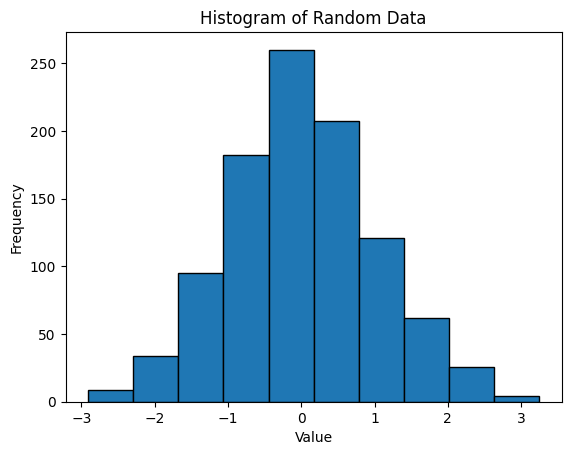

In [ ]:
# Creating a histogram
plt.hist(data, bins=10, edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

**Understanding Bins in Histograms**

Bins in histograms are used to group continuous data into intervals. Each bin represents a range of values, and the height of the bar in a bin represents the frequency of data points within that range.

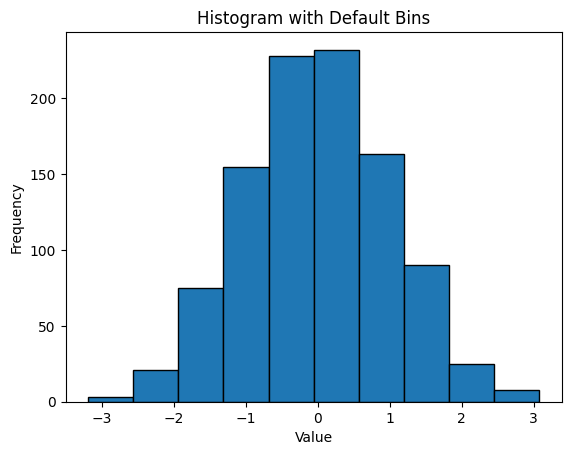

In [ ]:
#Simple Histogram with Default Bins
# Generate random data
data = np.random.randn(1000)

# Create a histogram with default bins
plt.hist(data, edgecolor='black')
plt.title('Histogram with Default Bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

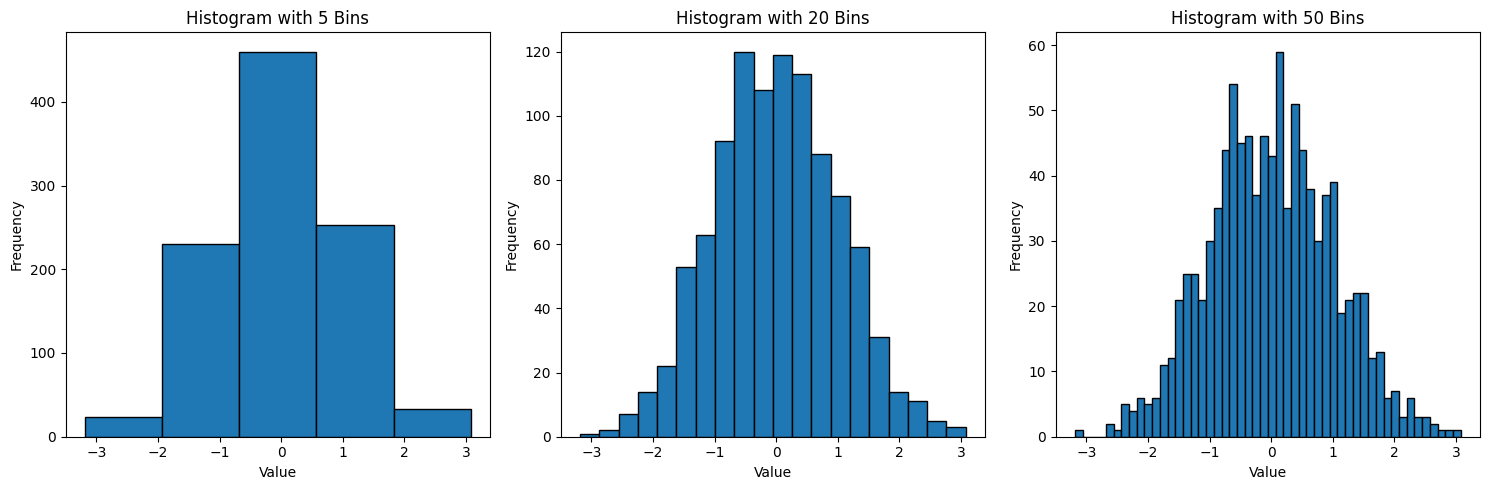

In [ ]:
# Create a subplot to compare histograms with different bins
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 5 bins
axes[0].hist(data, bins=5, edgecolor='black')
axes[0].set_title('Histogram with 5 Bins')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 20 bins
axes[1].hist(data, bins=20, edgecolor='black')
axes[1].set_title('Histogram with 20 Bins')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# 50 bins
axes[2].hist(data, bins=50, edgecolor='black')
axes[2].set_title('Histogram with 50 Bins')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Define custom bin edges
#You can also define custom bin edges to have more control over the histogram intervals.
bin_edges = [0, 1, 2, 3]

# Create a histogram with custom bin edges
plt.hist(data, bins=bin_edges, edgecolor='black')
plt.title('Histogram with Custom Bins')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Now, suppose we want to plot a bar graph for the count of the number of meteorites fallen in the interval of 5 years between 1970 and 2000. In this case, we will have 6 intervals. They are:

1. 1970 to 1975 (excluding 1975)

2. 1975 to 1980 (excluding 1980)

3. 1980 to 1985 (excluding 1985)

4. 1985 to 1990 (excluding 1990)

5. 1990 to 1995 (excluding 1995)

6. 1995 to 2000 (**including** 2000)



To create such bar graphs, we use a histogram. The bars in the count plot merge together to form one bar in the histogram. So, for example for the interval 1970 to 1975:

1. 1970 to 1975 (excluding 1975), the bars in a count plot for the years 1970, 1971, 1972, 1973 and 1974 will merge together to form one bar in a histogram.

To create a histogram, you can use the `hist()` function which exists in the `matplotlib.pyplot` library. The `hist()` function requires a one dimensional array/list/series as an input to create a histogram.

In [ ]:
#Create a Pandas series containing the year values between 1970 and 2000 including both of them.
m_1970_and_2000_series = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001), 'year']
m_1970_and_2000_series.shape

(22368,)

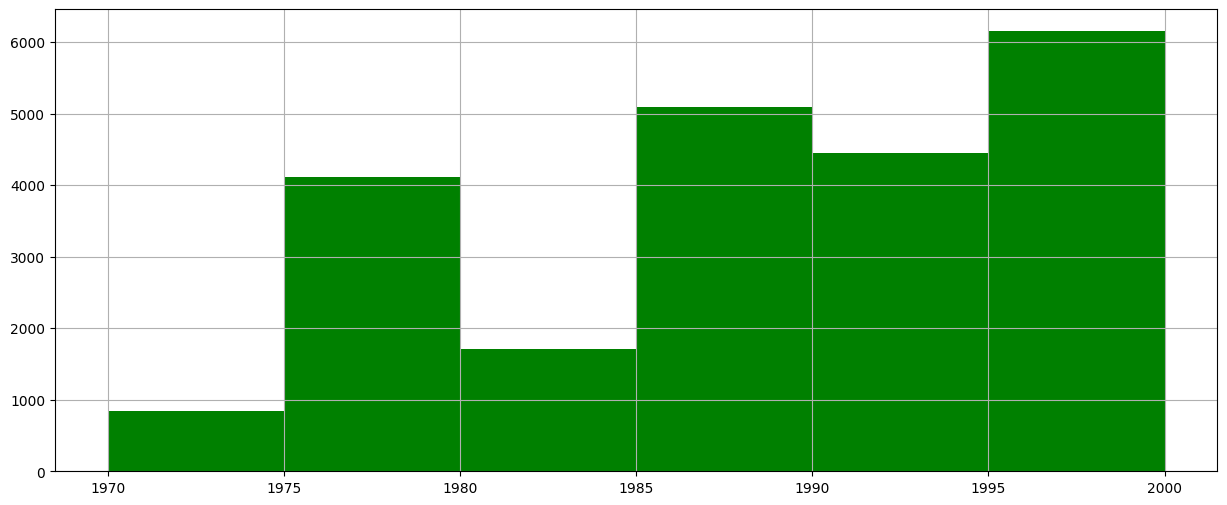

In [ ]:
#Create a histogram for the Pandas series containing the year values between 1970 and 2000 including both of them.
plt.figure(figsize=(15,6))
plt.hist(m_1970_and_2000_series,bins=6,color="green")
plt.grid()
plt.show()

**Note** The `bins` value to define the number of bars to be created in the histogram. Here, we are going to create 6 bars, hence we will pass `bins=6` as the second input to the `hist()` function.

### Activity 7: Histogram Using The `distplot()` Function

We can also create a histogram using the `distplot()` function from the `seaborn` module. The term `distplot` stands for distribution plot. It also takes a Pandas series / NumPy array / Python list as an input. The other inputs that you can provide are `bins` and `kde` values. The `kde` parameter takes a boolean value, i.e., either `True` or `False`. Let's set the `bins` parameter equal to `6` and the `kde` parameter equal to `False` in the `distplot()` function. [ We will learn about the `kde` parameter later ]

<ipython-input-60-dd12d2b49308>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_1970_and_2000_series, kde= False)


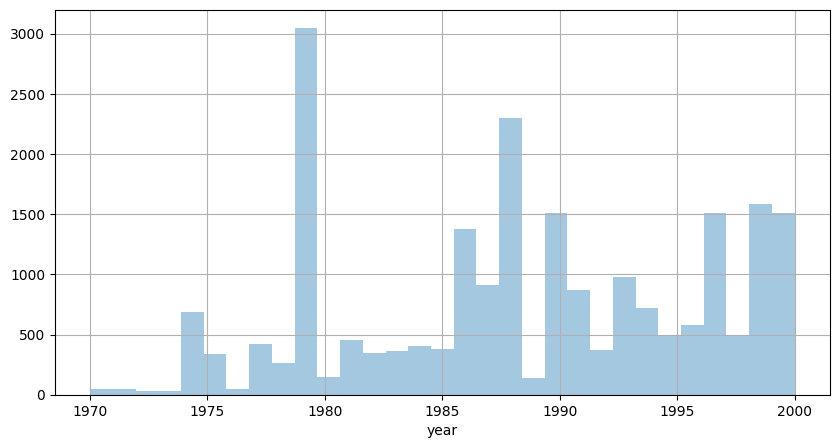

In [ ]:
#Create a histogram using the 'distplot()' function from the seaborn library.

plt.figure(figsize=(10, 5))
sns.distplot(m_1970_and_2000_series, kde= False)
plt.grid()
plt.show()

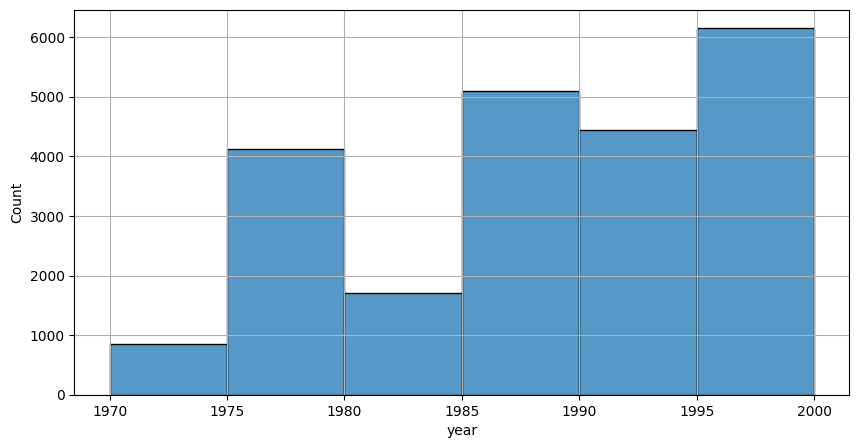

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(m_1970_and_2000_series, bins=6, kde= False)
plt.grid()
plt.show()

**Note**

As you can see, we have created the same histogram using the `distplot()` function. **The `distplot()` function is smarter in terms of choosing the appropriate default number of bins**. Hence, it is best to create a histogram using the `distplot()` function over the `hist()` function.